# Оптимизация изображений

В этой лабораторной мы рассмотрим две операции над изображениями:

- Сжатие изображений
- Удаление шума

### 1. Сжатие изображений

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('IU.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [ ]:
flag, encoded_img = cv.imencode('new_img.jpg', img, [cv.IMWRITE_JPEG_QUALITY, 50])
print(f"Encode is successfull: {flag}")
print(f"Size before encoding: {img.size}")
print(f"Encoded image shape: {encoded_img.size}")

Encode is successfull: True
Size before encoding: 842400
Encoded image shape: 36784


In [ ]:
decoded_img = cv.imdecode(encoded_img, cv.IMREAD_COLOR)
print(f"Decoded image shape: {decoded_img.size}")

Decoded image shape: 842400


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpecte

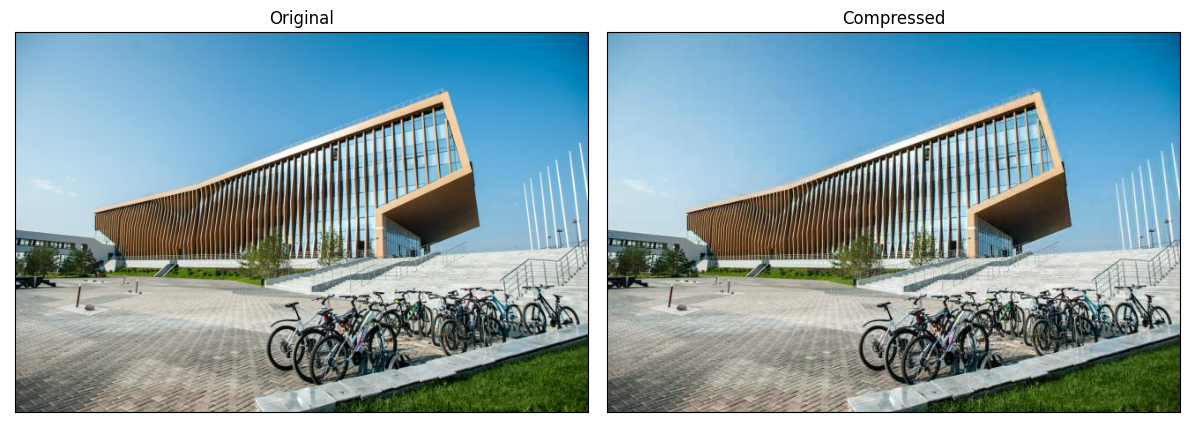

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))

ax[0].set(title='Original', xticks=[],yticks=[])
ax[0].imshow(img)

ax[1].set(title='Compressed', xticks=[],yticks=[])
ax[1].imshow(decoded_img)

fig.tight_layout()

plt.show()

#### 1.2 Сравнение изображений и оценка качества

In [ ]:
import numpy as np

# Mean-squared error
def calculate_mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

mse = calculate_mse(img, decoded_img)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 35.53309116809117


In [ ]:
# PSNR - Peak Signal-to-Noise Ratio
def calculate_psnr(img1, img2):
    mse = calculate_mse(img1, img2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10((img1.max()-img1.min()) / np.sqrt(mse))

psnr = calculate_psnr(img, decoded_img)
print(f"Peak Signal-to-Noise Ratio: {psnr}")

Peak Signal-to-Noise Ratio: 32.62447370692144


### 2. Удаление шума через

#### 2.1. Non-Local Means Denoising

Метод находит похожие куски изображений и вычисляет их среднее. Работает хорошо для картинок с нормальным шумом

Peak Signal-to-Noise Ratio between original and noisy image: 28.42684659711199
Peak Signal-to-Noise Ratio between original and denoised image: 30.92755614002016


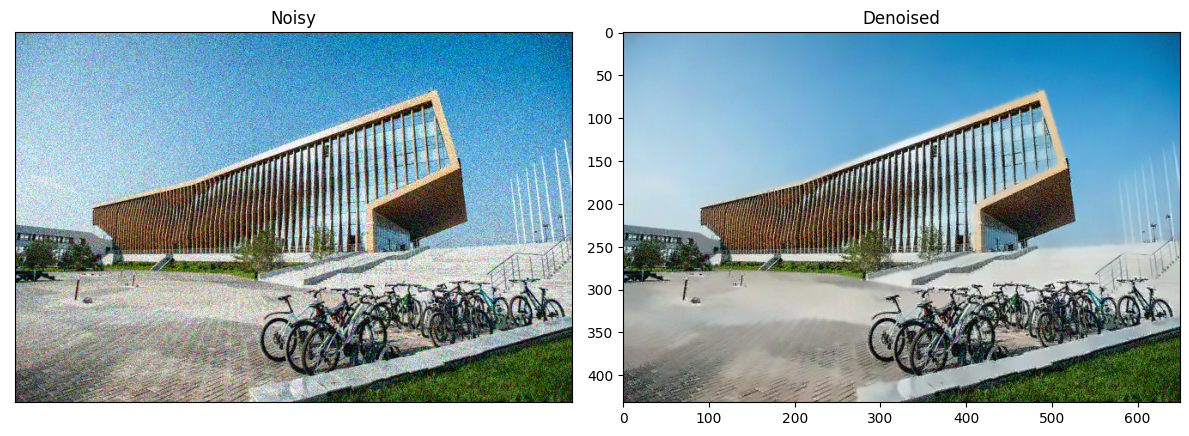

In [ ]:
import skimage

noisy_img = skimage.util.random_noise(img/255.0, mode="gaussian") * 255.0
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Параметры fastNlMeansDenoisingColored
# h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
# hColor : same as h, but for color images only. (normally same as h)
# templateWindowSize : should be odd. (recommended 7)
# searchWindowSize : should be odd. (recommended 21)
denoised_img = cv.fastNlMeansDenoisingColored(noisy_img, None, h=10, hColor=10,templateWindowSize=7, searchWindowSize=21)

psnr = calculate_psnr(img, noisy_img)
print(f"Peak Signal-to-Noise Ratio between original and noisy image: {psnr}")

psnr = calculate_psnr(img, denoised_img)
print(f"Peak Signal-to-Noise Ratio between original and denoised image: {psnr}")

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(title='Noisy', xticks=[],yticks=[])
ax[0].imshow(noisy_img)
ax[1].set(title='Denoised')
ax[1].imshow(denoised_img)

fig.tight_layout()

plt.show()

In [ ]:
def generate_salt_pepper_noise(img, noise_percent):
    print(img.shape)
    # Create an array of ones
    height = img.shape[0]
    width = img.shape[1]
    channels = 3

    mask = np.ones((height, width, channels))
    mask_size = height * width
    # Calculate how many elements we want to change to zero
    num_zeros = int(mask_size * noise_percent)
    for channel in range(channels):
        # Generate random indices where we want to change ones to zeros
        indices_to_change = np.random.choice(mask_size, num_zeros, replace=False)
        if channels == 1:
            mask[indices_to_change % height, indices_to_change // height] = 0
        else:
            mask[indices_to_change % height, indices_to_change // height, channel] = 0
    return (img * mask), mask

Для salt-pepper шума работает не так здорово...

(432, 650, 3)
Peak Signal-to-Noise Ratio between original and noisy image: 37.70537427559641
Peak Signal-to-Noise Ratio between original and denoised image: 36.75584535526428


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpecte

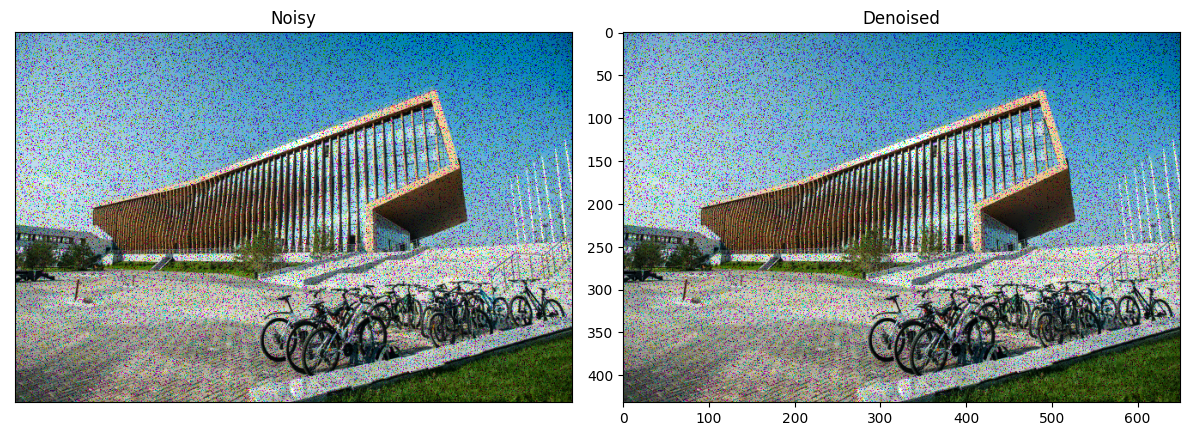

In [ ]:
noisy_img, _ = generate_salt_pepper_noise(img,0.1)
noisy_img = noisy_img.astype(np.uint8)

denoised_img = cv.fastNlMeansDenoisingColored(noisy_img, None, h=10, hColor=10,templateWindowSize=7, searchWindowSize=21)

psnr = calculate_psnr(img, noisy_img)
print(f"Peak Signal-to-Noise Ratio between original and noisy image: {psnr}")

psnr = calculate_psnr(img, denoised_img)
print(f"Peak Signal-to-Noise Ratio between original and denoised image: {psnr}")

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(title='Noisy', xticks=[],yticks=[])
ax[0].imshow(noisy_img)
ax[1].set(title='Denoised')
ax[1].imshow(denoised_img)

fig.tight_layout()

plt.show()

#### 2.2. Median Filter

Фильтрация через свертку: заменяет пиксели на медианное значение их соседей

(432, 650, 3)
Peak Signal-to-Noise Ratio between original and noisy image: 37.72570058442219
Peak Signal-to-Noise Ratio between original and denoised image: 32.24420632569499


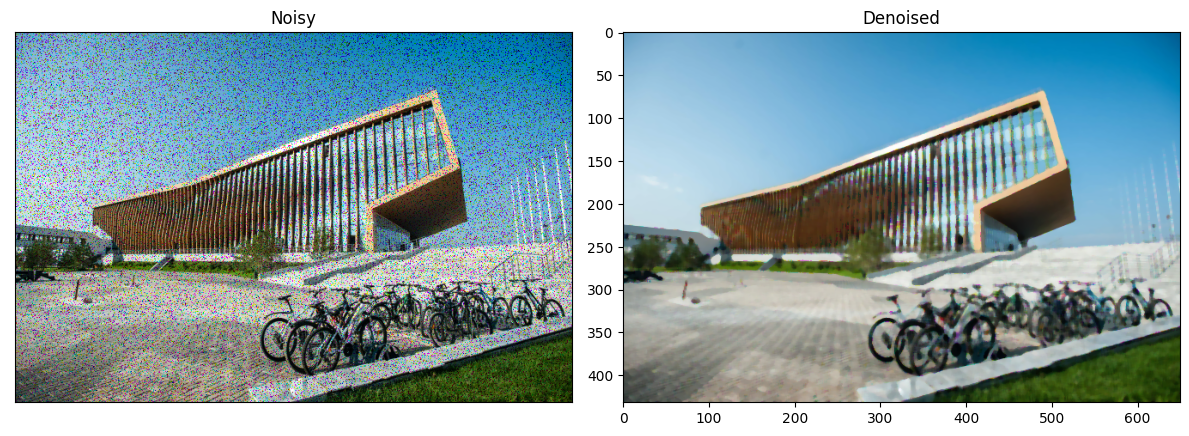

In [ ]:
#noisy_img = skimage.util.random_noise(img/255.0, mode="gaussian") * 255.0
#noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
noisy_img, _ = generate_salt_pepper_noise(img,0.1)
noisy_img = noisy_img.astype(np.uint8)


median_img = cv.medianBlur(noisy_img, 5)

psnr = calculate_psnr(img, noisy_img)
print(f"Peak Signal-to-Noise Ratio between original and noisy image: {psnr}")

psnr = calculate_psnr(img, median_img)
print(f"Peak Signal-to-Noise Ratio between original and denoised image: {psnr}")

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(title='Noisy', xticks=[],yticks=[])
ax[0].imshow(noisy_img)
ax[1].set(title='Denoised')
ax[1].imshow(median_img)

fig.tight_layout()

plt.show()

### 2.3 Фильтрация через разложение матриц

In [ ]:
from torchvision.transforms import GaussianBlur
from torch import diag, stack, cat, nn, tensor, linalg

from copy import deepcopy

def svd_decomposition(image, mask):
    X = tensor(image)
    mask_ = tensor(mask)
    # 3d -> 2d
    B_Miss = cat([X[:,:,0], X[:,:,1], X[:,:,2]], dim=1)
    print(B_Miss.shape)
    mask_flatten = cat([mask_[:,:,0], mask_[:,:,1], mask_[:,:,2]], dim=1)
    rev_mask = (mask_flatten - 1) * (-1)
    rank = 50
    X = B_Miss.detach().clone()

    for _ in range(20):
        try:
            u, sig, vh = linalg.svd(X, full_matrices=False)
            Y = u[:,:rank] @ diag(sig[:rank]) @ vh[:rank,:]
            X = B_Miss + rev_mask * Y
            X = tensor(cv.GaussianBlur(X.detach().numpy(), ksize=(5,5), sigmaX=0.7))
        except Exception as exc:
            print(f"Exception in svd_decomposition: {str(exc)}")
    X = stack([X[:, :image.shape[1]],
               X[:, image.shape[1]:image.shape[1] * 2],
               X[:, image.shape[1] * 2:]]).permute(1, 2, 0)
    print(X.shape)
    return X.detach().numpy()

(432, 650, 3)
torch.Size([432, 1950])
torch.Size([432, 650, 3])
Peak Signal-to-Noise Ratio between original and noisy image: 14.167652657021977
Peak Signal-to-Noise Ratio between original and denoised image: 27.186172906164803


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpecte

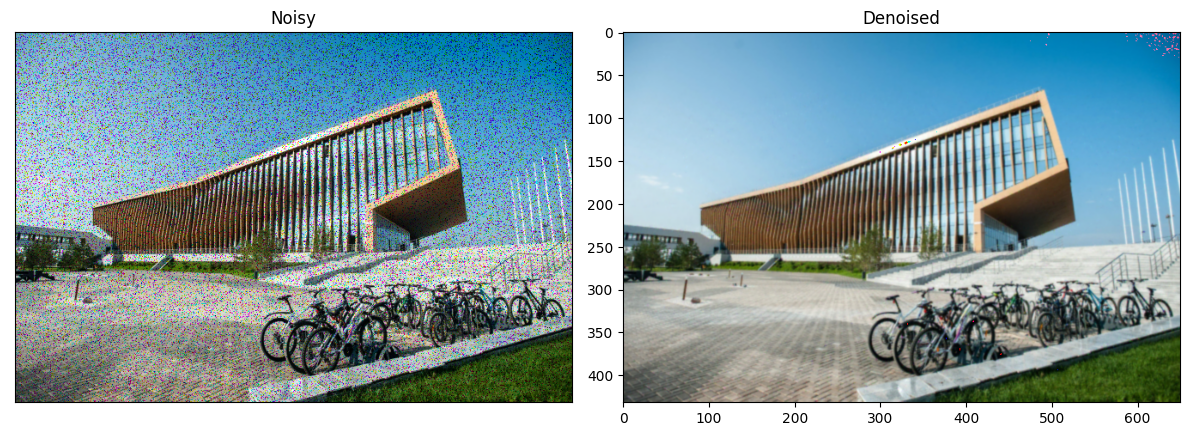

In [ ]:
noisy_img, mask = generate_salt_pepper_noise(img, 0.1)
reconstructed_img = svd_decomposition(noisy_img, mask)

psnr = calculate_psnr(img, noisy_img)
print(f"Peak Signal-to-Noise Ratio between original and noisy image: {psnr}")

psnr = calculate_psnr(img, reconstructed_img)
print(f"Peak Signal-to-Noise Ratio between original and denoised image: {psnr}")

noisy_img = noisy_img.astype(np.uint8)
reconstructed_img = reconstructed_img.astype(np.uint8)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 8))
ax[0].set(title='Noisy', xticks=[],yticks=[])
ax[0].imshow(noisy_img)
ax[1].set(title='Denoised')
ax[1].imshow(reconstructed_img)

fig.tight_layout()

plt.show()